In [1]:
# imports :

import pandas as pd                                
 
import numpy as np                               

import os                                         

import matplotlib.pyplot as plt                          

import seaborn as sns                                 

from wordcloud import WordCloud   

import nltk                                         

from nltk.stem import PorterStemmer              

from nltk.stem import WordNetLemmatizer          

from nltk.corpus import stopwords            


import re                                

from sklearn import linear_model ,svm    


Reading & preprocessing the data:


In [2]:
data=pd.read_csv("spam_Filtaration.csv")
print(data)

      CATEGORY                                            MESSAGE  \
0            1  Dear Homeowner,\n\n \n\nInterest Rates are at ...   
1            1  ATTENTION: This is a MUST for ALL Computer Use...   
2            1  This is a multi-part message in MIME format.\n...   
3            1  IMPORTANT INFORMATION:\n\n\n\nThe new domain n...   
4            1  This is the bottom line.  If you can GIVE AWAY...   
...        ...                                                ...   
5791         0  I'm one of the 30,000 but it's not working ver...   
5792         0  Damien Morton quoted:\n\n>W3C approves HTML 4 ...   
5793         0  On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...   
5794         0  Once upon a time, Manfred wrote :\n\n\n\n> I w...   
5795         0  If you run Pick, and then use the "New FTOC" b...   

                                   FILE_NAME  
0     00249.5f45607c1bffe89f60ba1ec9f878039a  
1     00373.ebe8670ac56b04125c25100a36ab0510  
2     00214.1367039e50dc6b7adb

In [3]:
data.drop('FILE_NAME',axis=1,inplace=True)

In [4]:
data.CATEGORY.value_counts()

CATEGORY
0    3900
1    1896
Name: count, dtype: int64

Text(0.5, 0.98, ' 0 -->> not spam & 1 -->> spam')

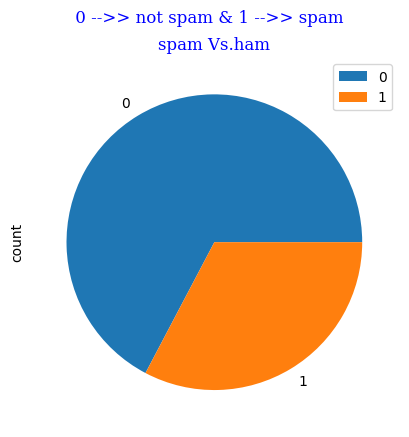

In [5]:
f={"family":"serif","color":"blue","size":12}
data["CATEGORY"].value_counts().plot(kind="pie",legend=True)
plt.title("spam Vs.ham",fontdict=f)
plt.suptitle(" 0 -->> not spam & 1 -->> spam",fontdict=f)


Text(0.5, 0.98, ' 0 -->> not spam & 1 -->> spam')

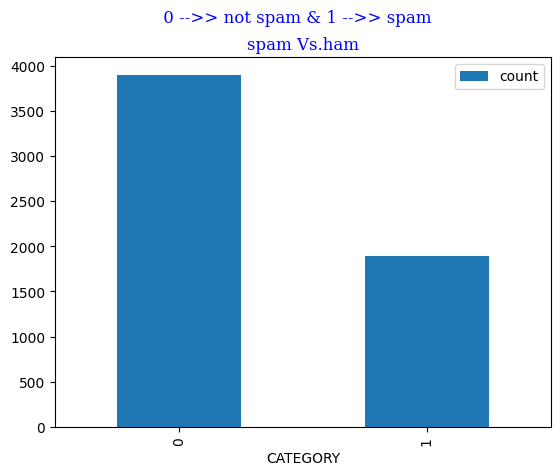

In [6]:
plt.title("spam Vs.ham",fontdict=f)
plt.suptitle("0 -->> not spam & 1 -->> spam",fontdict=f)
data["CATEGORY"].value_counts().plot(kind="bar",legend=True)
plt.suptitle(" 0 -->> not spam & 1 -->> spam",fontdict=f)

In [7]:
data

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abdalrahman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/abdalrahman/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
!pip install nltk
!python -m nltk.downloader wordnet

Defaulting to user installation because normal site-packages is not writeable
/usr/bin/python: No module named nltk


In [11]:
stopword = nltk.corpus.stopwords.words('english')

In [12]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['MESSAGE'][i])  
    review=review.lower()                                
    review=review.split()                                 
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]      
    review=' '.join(review)                                
    corpus.append(review)                                  


In [13]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken

X=cv.fit_transform(corpus).toarray()

y=data['CATEGORY']

Modeling:

1- Logistic Regression:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [16]:
# create model1 (LogisticRegression) --->> Classification

model1=linear_model.LogisticRegression()
model1.fit(x_train,y_train)


/home/abdalrahman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_predict=model1.predict(x_test)
y_predict[:15]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [18]:
from sklearn import metrics
import sklearn

# Acc:

print(f"accuracy --->>> {metrics.accuracy_score(y_test,y_predict)*100:0.2f}%")
print(f"accuracy of errors --->>>{ 100-(metrics.accuracy_score(y_test,y_predict))*100:0.2f}%")

# confusion:

cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]
print("------------------------------------")
print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)
print("------------------------------------")



accuracy --->>> 98.56%
accuracy of errors --->>>1.44%
------------------------------------
True positve prediction : 552
True Negative predicion : 1162
False positve prediction: 8
False Negative prediction: 17
------------------------------------


Modeling :



2-Support Vector Classifier


In [19]:
from sklearn import svm

sm=svm.SVC(random_state=42,kernel="linear")
sm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [20]:
y_pred=sm.predict(x_test)
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [21]:
print(f"accuray={metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")
print(f"accuracy of errors --->>>{ 100-(metrics.accuracy_score(y_test,y_predict))*100:0.5f}%")
print("-----------------------------------------------")
cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[0,1],cm[1,0]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)
print("---------------------------------------")

report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)



accuray=98.04%
accuracy of errors --->>>1.43761%
-----------------------------------------------
True positve prediction : 552
True Negative predicion : 1162
False positve prediction: 8
False Negative prediction: 17
---------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       0.99      0.97      0.98       569

    accuracy                           0.99      1739
   macro avg       0.99      0.98      0.98      1739
weighted avg       0.99      0.99      0.99      1739

